In [ ]:
!pip install pydicom
!pip install pillow
!pip install pylibjpeg pylibjpeg-libjpeg pydicom
!pip install dicom

In [ ]:
!pip install --upgrade numpy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import PIL
import pylibjpeg
import nibabel as nib

import pydicom as dicom

from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.7/dist-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


Mounted at /content/drive


In [ ]:
ISCH_DIRECTORY = "/content/drive/MyDrive/Stem Proyectp/Ischemic_Training"
HEM_DIRECTORY = "/content/drive/MyDrive/Stem Proyectp/set2/Brain_Data_Organised/Stroke"
HEM_DIRECTORY2 = "/content/drive/MyDrive/Stem Proyectp/Hemorrhage_Set_1"
NORMAL_DIRECTORY = "/content/drive/MyDrive/Stem Proyectp/set2/Brain_Data_Organised/Normal"

In [ ]:
training_set = []
IMG_SIZE = 256

In [ ]:
def add_normal():
  i = 0
  
  for item in os.listdir(NORMAL_DIRECTORY):
    if i <= 250:
      source = os.path.join(NORMAL_DIRECTORY, item)

      img_array = cv2.imread(source, cv2.IMREAD_GRAYSCALE)
      img_array2 = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

      img_array3 = img_array2 / 255.0

      im = np.zeros(img_array3.shape)

      for x in range(0, img_array3.shape[0]):
        for y in range(0, img_array3.shape[1]):
          im[x][y] = img_array3[x][y] * 255   

      im = im.astype(np.uint8)
      im2 = cv2.equalizeHist(im)

      im3 = im2 / 255.0

      training_set.append([im3, 0])
      i += 1
    else:
      break

In [ ]:
def add_hemorrhagic():
  i = 0

  for item in os.listdir(HEM_DIRECTORY):
    if i <= 250:
      source = os.path.join(HEM_DIRECTORY, item)

      img_array = cv2.imread(source, cv2.IMREAD_GRAYSCALE)
      img_array2 = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      img_array3 = img_array2 / 255.0

      im = np.zeros(img_array3.shape)

      for x in range(0, img_array3.shape[0]):
        for y in range(0, img_array3.shape[1]):
          im[x][y] = img_array3[x][y] * 255   

      im = im.astype(np.uint8)
      im2 = cv2.equalizeHist(im)

      im3 = im2 / 255.0

      training_set.append([im3, 1])
      i += 1
    else:
      break

In [ ]:
def add_hemorrhagic2():
  i = 0

  for folder in os.listdir(HEM_DIRECTORY2):
    dir1 = os.path.join(HEM_DIRECTORY2, folder)

    for subfolder in os.listdir(dir1):
      dir2 = os.path.join(dir1, subfolder)

      for sub2folder in os.listdir(dir2):
        dir3 = os.path.join(dir2, sub2folder)

        for item in os.listdir(dir3):
          if i <= 250:
            source = os.path.join(dir3, item)

            img = dicom.dcmread(source)
            img_array = img.pixel_array

            min = img_array.min()
            img_array2 = np.zeros(img_array.shape)

            add = 0 - min

            for x in range(0, img_array.shape[0]):
              for y in range (0, img_array.shape[1]):
                img_array2[x][y] = img_array[x][y] + add

            img_array3 = cv2.resize(img_array2, (IMG_SIZE, IMG_SIZE))
            img_array4 = img_array3 / float(img_array3.max())

            im = np.zeros(img_array4.shape)

            for x in range(0, img_array4.shape[0]):
              for y in range(0, img_array4.shape[1]):
                im[x][y] = img_array4[x][y] * 255   

            im = im.astype(np.uint8)
            im2 = cv2.equalizeHist(im)

            im3 = im2 / 255.0
            
            training_set.append([im3, 1])
            i += 1
          else:
            return 0

In [ ]:
def add_ischemic():
  for item in os.listdir(ISCH_DIRECTORY):
    source = os.path.join(ISCH_DIRECTORY, item)

    scan = nib.load(source)
    scan_array = scan.get_fdata()
    shape = scan_array.shape
    slices = shape[2]

    for i in range(0, slices):
      img_array = np.array(scan_array[:, :, i])

      minimum = img_array.min()
      img_array2 = np.zeros(img_array.shape)

      add = 0 - minimum
      for x in range(0, img_array.shape[0]):
        for y in range(0, img_array.shape[1]):
          img_array2[x][y] = img_array[x][y] + add
      
      img_array3 = cv2.resize(img_array2, (IMG_SIZE, IMG_SIZE))
      
      img_array4 = img_array3 / float(img_array3.max())

      im = np.zeros(img_array4.shape)

      for x in range(0, img_array4.shape[0]):
        for y in range(0, img_array4.shape[1]):
          im[x][y] = img_array4[x][y] * 255   

      im = im.astype(np.uint8)
      im2 = cv2.equalizeHist(im)

      im3 = im2 / 255.0

      training_set.append([im3, 2])

In [ ]:
add_normal()
print(len(training_set))
add_hemorrhagic()
print(len(training_set))
add_hemorrhagic2()
print(len(training_set))
add_ischemic()
print(len(training_set))

251
502
753
1025


In [ ]:
import random

random.shuffle(training_set)

In [ ]:
print(len(training_set))

1025


0.0
1.0
0


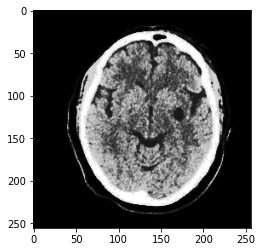

In [ ]:
a = 47
array = training_set[a][0]

print(array.min())
print(array.max())
print(training_set[a][1])
plt.imshow(array, cmap = 'gray')
plt.show()

In [ ]:
set_features = []
set_labels = []

for features, labels in training_set:
  set_features.append(features)
  set_labels.append(labels)

set_features = np.array(set_features).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
set_labels = np.array(set_labels)

In [ ]:
print(set_features[2])
print(set_labels[2])
print(set_features.shape)
print(set_labels.shape)

[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]
0
(1025, 256, 256, 1)
(1025,)


In [ ]:
X = set_features
y = set_labels

In [ ]:
outfile = "/content/drive/MyDrive/Stem Proyectp/Project/DataStorage/set3_features.npy"
outfile2 = "/content/drive/MyDrive/Stem Proyectp/Project/DataStorage/set3_labels.npy"

np.save(outfile, X)
np.save(outfile2, y)